In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Defining X_train and y_train data for polynomial regression

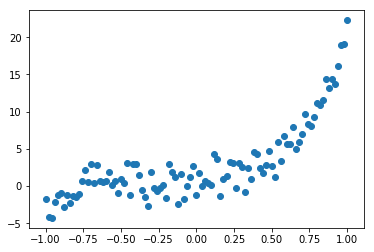

In [2]:
learning_rate = 0.01
num_epochs = 100

# Creating X_train evenly spaced points
X_train = np.linspace(-1,1,101)

# Creating exponential y-train value
num_coeffs = 6 # Degree 5 polynomial and one bias
y_train_coeff = [1,2,3,4,5,6]
y_train = 0
for i in range(num_coeffs):
    y_train += y_train_coeff[i]*np.power(X_train, i)

# Adding noise to y_train
y_train += np.random.randn(*X_train.shape)*1.5

plt.scatter(X_train, y_train)
plt.show()


### Describing tensorflow model

In [7]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Defining a polynomial model of degree 5
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

# Declaring weight variable
w = tf.Variable([0.]*num_coeffs, name = "parameters")

# Declaring y_model variable
Y_model = model(X, w)

# Declaring cost variable
cost = tf.square(Y - Y_model)

# Defining training optimizer
train_op = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

# Initializing the session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Running the epochs
for epoch in range(num_epochs):
    for (x,y) in zip(X_train, y_train):
        sess.run(train_op, feed_dict = {X:x, Y:y})

# Extracting fitted w value
w_pred = sess.run(w)
print(w_pred)

sess.close()

[ 0.72941506  1.39538682  4.97697592  4.24860287  2.84027505  6.52269506]


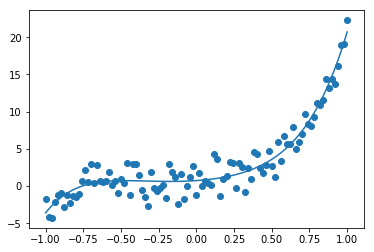

In [8]:
plt.scatter(X_train, y_train)
# Computing y_predicted and plotting it against the curve
Y_pred = 0
for i in range(num_coeffs):
    Y_pred += w_pred[i]*np.power(X_train, i)
plt.plot(X_train, Y_pred)